# A Project for You



## Instructions

For this, you'll need to make several classification models and select the best one. Your notebook will illustrate and explain this process. 

### Detailed Requirements

<ol>
<li> You need one model per person. Decide on a slightly different approach for each person - you can change things like varaibles used, preparation, Regression or Bayes models, and othe things like that.</li>
<li> For each model, you must: </li>
    <ol>
    <li> Create a predictive model. </li>
    <li> Evaluate its performance. </li>
    <li> Create a markdown cell that explains your model choice and evaluation. </li>
    </ol>
<li> Overall, as a team, your team will select the best model from the selection. </li>
<li> <b> This needs to be in one workbook, containing: </b></li>
    <ol>
    <li> Initial data exploration/preparation from original data to 'ready for modeling'. Any preparation that is <b>common</b> to everyone should go here. Exact details will vary, but you want to explore the data visually as well as numerically. Focus on stuff that impacted decisions - what did you find in the data that caused you to take action or make a different choice? </li>
    <li> A markdown cell that briefly explains, ideally mostly in point form, what you found whilst exploring and what preparation you needed to do. Based on those findings, what are the different model approaches?</li>
    <li> Each person's model, evaluation, and explanation in their own section. </li>
    <li> An overall conclusion of what was best and how well it worked. Present your results in some kind of visualization. </li>
    </ol>
<li><b> In the workbook, please have the code that you settled on to explore, clean, model, and evaluate. In the explaination cells, give a brief explaination of what you did and how you got to what you settled on. </b> </li>
<li> In the data preparation, consider statistics stuff. Things such as transformations may be worth a try. </li>
<li> You don't need to spent an eternity tuning the models to get amazing results, we will worry more about that later. Make N reasonable choices on an approach to take based on what the data looks like, do the appropriate preparation, test the models, and observe the results. <b>The raw accuracy scores don't matter, only the approach.</b> </li>
</ol>

Overall, the workbook should clearly show what happened - you exlored the data, made some general processing steps, decided on different approaches based on what you found, created models according to each approach (model specific exploration/prep, model creation, evaluation), and an overall conclusion summarising what you found and what you would try next if you were to continue testing. In doing the data exploration especially, it is pretty normal to have several iterations of exploring and cleaning data - for example, you might add a filter for an outlier, look at a pair plot, adjust the filter, look at a pair plot, add another filter, look at a pair plot, and so on. Please don't show this literal process step by step, condense it down to what matters - something like, "here's the distributions, we did these outlier filters and removed these two features, here's the result", then continuing on. Basically, illustrate what happened and why, but not all of the back and forth or deliberation that went into it.

<b>Note:</b> I said that you can try Bayes as well; it isn't mandatory, but feel free. If you do, you'll need to likely do a little reading on the details of exactly what to use, there are a few variations on Bayes that aren't just 'Bayes' and you'll need to select. The documentation has a pretty good explainer (it is generally linkined in the 'user guide' link of each model's documentaion page, or google "sklearn naive bayes"), and things work more or less the same, you just need to meet the requirements of the specific model you choose.

### Submission and Marks
<ul>
<li> Check your work into the repository. I'm reading one file, so please make sure it is condensed. </li>
<li> Grade distribution: </li>
    <ul>
    <li> Your model - from the end of the common preparation to your evaluation and explaination. Was it done correctly. 25% </li>
    <li> Exploration and common preparation - code was clear, exploration was readable, preparation was done correctly, and explaination made sense. 25% </li>
    <li> Team choice on model approach - based on what you fond in exloration, you made reasonable choices on the different model approaches. 10% </li>
    <li> Overall conclusion - reasonable choice on best model, <b>thoughts on what you may try next if you were to keep testing</b>, and results presented clearly. 20% </li>
    <li> "Can I read and understand it?" - overall, you're explaining what you found, can I read it and understand what you did. 20% </li>
    </ul>
</ul>

#### Data Dictionary

📘 Overview

This dataset provides detailed information about students enrolled in various online courses. It includes demographic, behavioral, and performance features to predict whether a learner will complete the course or drop out.

📊 Key Details
<ul>
<li>Rows: 100,000</li>
<li>Target Variable: Completed</li>
</ul>

🧠 Feature Categories
<ul>
<li>Demographic: Gender, Age, Education_Level, Employment_Status</li>
<li>Course Info: Course_Level, Duration, Instructor_Rating</li>
<li>Engagement: Login_Frequency, Video_Completion_Rate, Discussion_Participation</li>
<li>Performance: Assignments_Submitted, Quiz_Score_Avg, Project_Grade, Progress_Percentage</li>
<li>Other: Payment_Mode, Discount_Used, App_Usage_Percentage</li>
</ul>

<b>Note:</b> The feature set is mixed, meaning there are both categorical and numerical variables present in the dataset. <b>Mixed featureds generally require different processing. We haven't done the tool that mixes these easily yet, that's fine and ok, we have stats instead. Right now, there are several decisions you can make to use both the numerical and categorical data together, think about how to represent the data and some of the options we have available for transformations.</b> This is part of what you want to figure out while exploring the data - you have a constraint on your ability to use mixed feature sets, yet you must use the data you <i>do</i> have, along with the different processing choices you can make, to create a model. Again, you are testing a few approaches against each other, the idea isn't to pick the best approach off the top of your head, it's to make reasonable attempts to narrow down what works best. This isn't a trick for one specific action, there's a bunch of things you can do that are reasonable. Later, we'll automate some of this, so we can try more things to work towards the 'best' model.

In [1]:
import pandas as pd

df = pd.read_csv("cleaned_student_data.csv")
TARGET_COL = "Completed"
print(df[TARGET_COL].describe())
df.sample(10)

count            100000
unique                2
top       Not Completed
freq              50970
Name: Completed, dtype: object


,Student_ID,Name,Gender,Education_Level,Employment_Status,City,Device_Type,Internet_Connection_Quality,Course_ID,Course_Name,...,Assignments_Submitted,Quiz_Attempts,Progress_Percentage,Enrollment_Date,Payment_Mode,Fee_Paid,Discount_Used,App_Usage_Percentage,Satisfaction_Rating,Completed
84699,STU184699,Vihaan Nair,Female,Diploma,Student,Lucknow,Laptop,High,C105,UI/UX Design Fundamentals,...,8,5,82.7,26-01-2024,Credit Card,Yes,No,31,4.0,Not Completed
28968,STU128968,Kavya Shah,Male,Bachelor,Unemployed,Hyderabad,Mobile,Medium,C102,Data Analysis with Python,...,1,4,30.5,30-06-2024,Credit Card,Yes,No,49,4.0,Completed
22840,STU122840,Ritika Gupta,Male,Bachelor,Employed,Indore,Laptop,Medium,C101,Python Basics,...,6,4,55.2,07-04-2025,UPI,Yes,No,60,4.0,Completed
52919,STU152919,Ananya Nair,Male,Bachelor,Employed,Delhi,Tablet,Medium,C106,Machine Learning A-Z,...,4,6,57.7,09-07-2024,Debit Card,Yes,No,64,3.0,Not Completed
41885,STU141885,Meera Nair,Female,Diploma,Student,Lucknow,Mobile,Low,C108,Excel for Business,...,5,2,54.9,26-10-2023,NetBanking,Yes,No,83,4.0,Completed
5340,STU105340,Sakshi Gupta,Female,Diploma,Student,Kolkata,Tablet,Low,C106,Machine Learning A-Z,...,3,2,36.9,08-09-2024,Debit Card,Yes,No,61,5.0,Not Completed
23635,STU123635,Sneha Desai,Male,Bachelor,Student,Jaipur,Mobile,High,C107,Statistics for Data Science,...,4,3,57.0,19-10-2024,UPI,Yes,No,59,4.0,Completed
44843,STU144843,Ritika Desai,Female,Diploma,Employed,Lucknow,Mobile,Medium,C102,Data Analysis with Python,...,3,1,52.1,08-11-2023,UPI,Yes,Yes,99,5.0,Completed
93184,STU193184,Neha Shah,Female,Master,Employed,Bengaluru,Mobile,Medium,C107,Statistics for Data Science,...,2,2,42.5,05-01-2024,Free,No,Yes,31,4.0,Not Completed
13684,STU113684,Rohan Bose,Female,Bachelor,Student,Vadodara,Mobile,Medium,C103,Introduction to AI,...,5,3,61.8,21-12-2023,UPI,Yes,No,84,4.0,Completed


In [2]:
df.columns

Index(['Student_ID', 'Name', 'Gender', 'Education_Level', 'Employment_Status',
       'City', 'Device_Type', 'Internet_Connection_Quality', 'Course_ID',
       'Course_Name', 'Category', 'Course_Level', 'Discussion_Participation',
       'Time_Spent_Hours', 'Days_Since_Last_Login', 'Peer_Interaction_Score',
       'Assignments_Submitted', 'Quiz_Attempts', 'Progress_Percentage',
       'Enrollment_Date', 'Payment_Mode', 'Fee_Paid', 'Discount_Used',
       'App_Usage_Percentage', 'Satisfaction_Rating', 'Completed'],
      dtype='object')

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss
import math
import random


## Regression stuff
from statsmodels.tools.eval_measures import rmse
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, root_mean_squared_error, accuracy_score, f1_score, log_loss, confusion_matrix
import statsmodels.api as sm

# Bayes
from fractions import Fraction
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OrdinalEncoder

#### Initial Data Prep and Cleaning

In [4]:
## Get only the non-features & non-target columns
## ['Age', 'Video_Completion_Rate', 'Quiz_Score_Avg', 'Project_Grade'] not in index
## Used Time_Spent_Hours -> Duration, Days_Since_Last_Login -> Login Frequency, Satisfaction_Rating -> Instructor_Rating
df2 = df.copy()
df2 = df2[["Gender", "Education_Level", "Employment_Status", "Course_Level", "Time_Spent_Hours", "Days_Since_Last_Login", 
           "Satisfaction_Rating", "Discussion_Participation", "Assignments_Submitted", "Progress_Percentage", 
          "Payment_Mode", "Discount_Used", "App_Usage_Percentage", TARGET_COL]]


df2.head()

,Gender,Education_Level,Employment_Status,Course_Level,Time_Spent_Hours,Days_Since_Last_Login,Satisfaction_Rating,Discussion_Participation,Assignments_Submitted,Progress_Percentage,Payment_Mode,Discount_Used,App_Usage_Percentage,Completed
0,Male,Diploma,Student,Intermediate,0.5,1,4.0,2,8,70.8,Scholarship,No,49,Completed
1,Female,Bachelor,Student,Advanced,0.9,3,4.0,2,4,55.6,Credit Card,No,86,Not Completed
2,Female,Master,Student,Beginner,0.5,19,5.0,3,8,78.8,NetBanking,No,85,Completed
3,Female,Diploma,Employed,Beginner,7.4,19,4.0,1,0,24.7,UPI,No,42,Completed
4,Female,Master,Self-Employed,Advanced,0.5,4,4.0,1,5,64.9,Debit Card,Yes,91,Completed


<p>There appeared to be some columns from the Feature Categories list above that are missing from the dataframe. Tried to sub what we could</p>

##### Change column types

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Gender                    100000 non-null  object 
 1   Education_Level           100000 non-null  object 
 2   Employment_Status         100000 non-null  object 
 3   Course_Level              100000 non-null  object 
 4   Time_Spent_Hours          100000 non-null  float64
 5   Days_Since_Last_Login     100000 non-null  int64  
 6   Satisfaction_Rating       100000 non-null  float64
 7   Discussion_Participation  100000 non-null  int64  
 8   Assignments_Submitted     100000 non-null  int64  
 9   Progress_Percentage       100000 non-null  float64
 10  Payment_Mode              100000 non-null  object 
 11  Discount_Used             100000 non-null  object 
 12  App_Usage_Percentage      100000 non-null  int64  
 13  Completed                 100000 non-null  ob

In [6]:
## Changed these columns to category
df2["Gender"] = df2["Gender"].astype("category")
df2["Education_Level"] = df2["Education_Level"].astype("category")
df2["Employment_Status"] = df2["Employment_Status"].astype("category")
df2["Course_Level"] = df2["Course_Level"].astype("category")
df2["Payment_Mode"] = df2["Payment_Mode"].astype("category")
df2["Discount_Used"] = df2["Discount_Used"].astype("category")
df2["Completed"] = df2["Completed"].astype("category")

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Gender                    100000 non-null  category
 1   Education_Level           100000 non-null  category
 2   Employment_Status         100000 non-null  category
 3   Course_Level              100000 non-null  category
 4   Time_Spent_Hours          100000 non-null  float64 
 5   Days_Since_Last_Login     100000 non-null  int64   
 6   Satisfaction_Rating       100000 non-null  float64 
 7   Discussion_Participation  100000 non-null  int64   
 8   Assignments_Submitted     100000 non-null  int64   
 9   Progress_Percentage       100000 non-null  float64 
 10  Payment_Mode              100000 non-null  category
 11  Discount_Used             100000 non-null  category
 12  App_Usage_Percentage      100000 non-null  int64   
 13  Completed                 1000

##### Filtering Initial Outliers

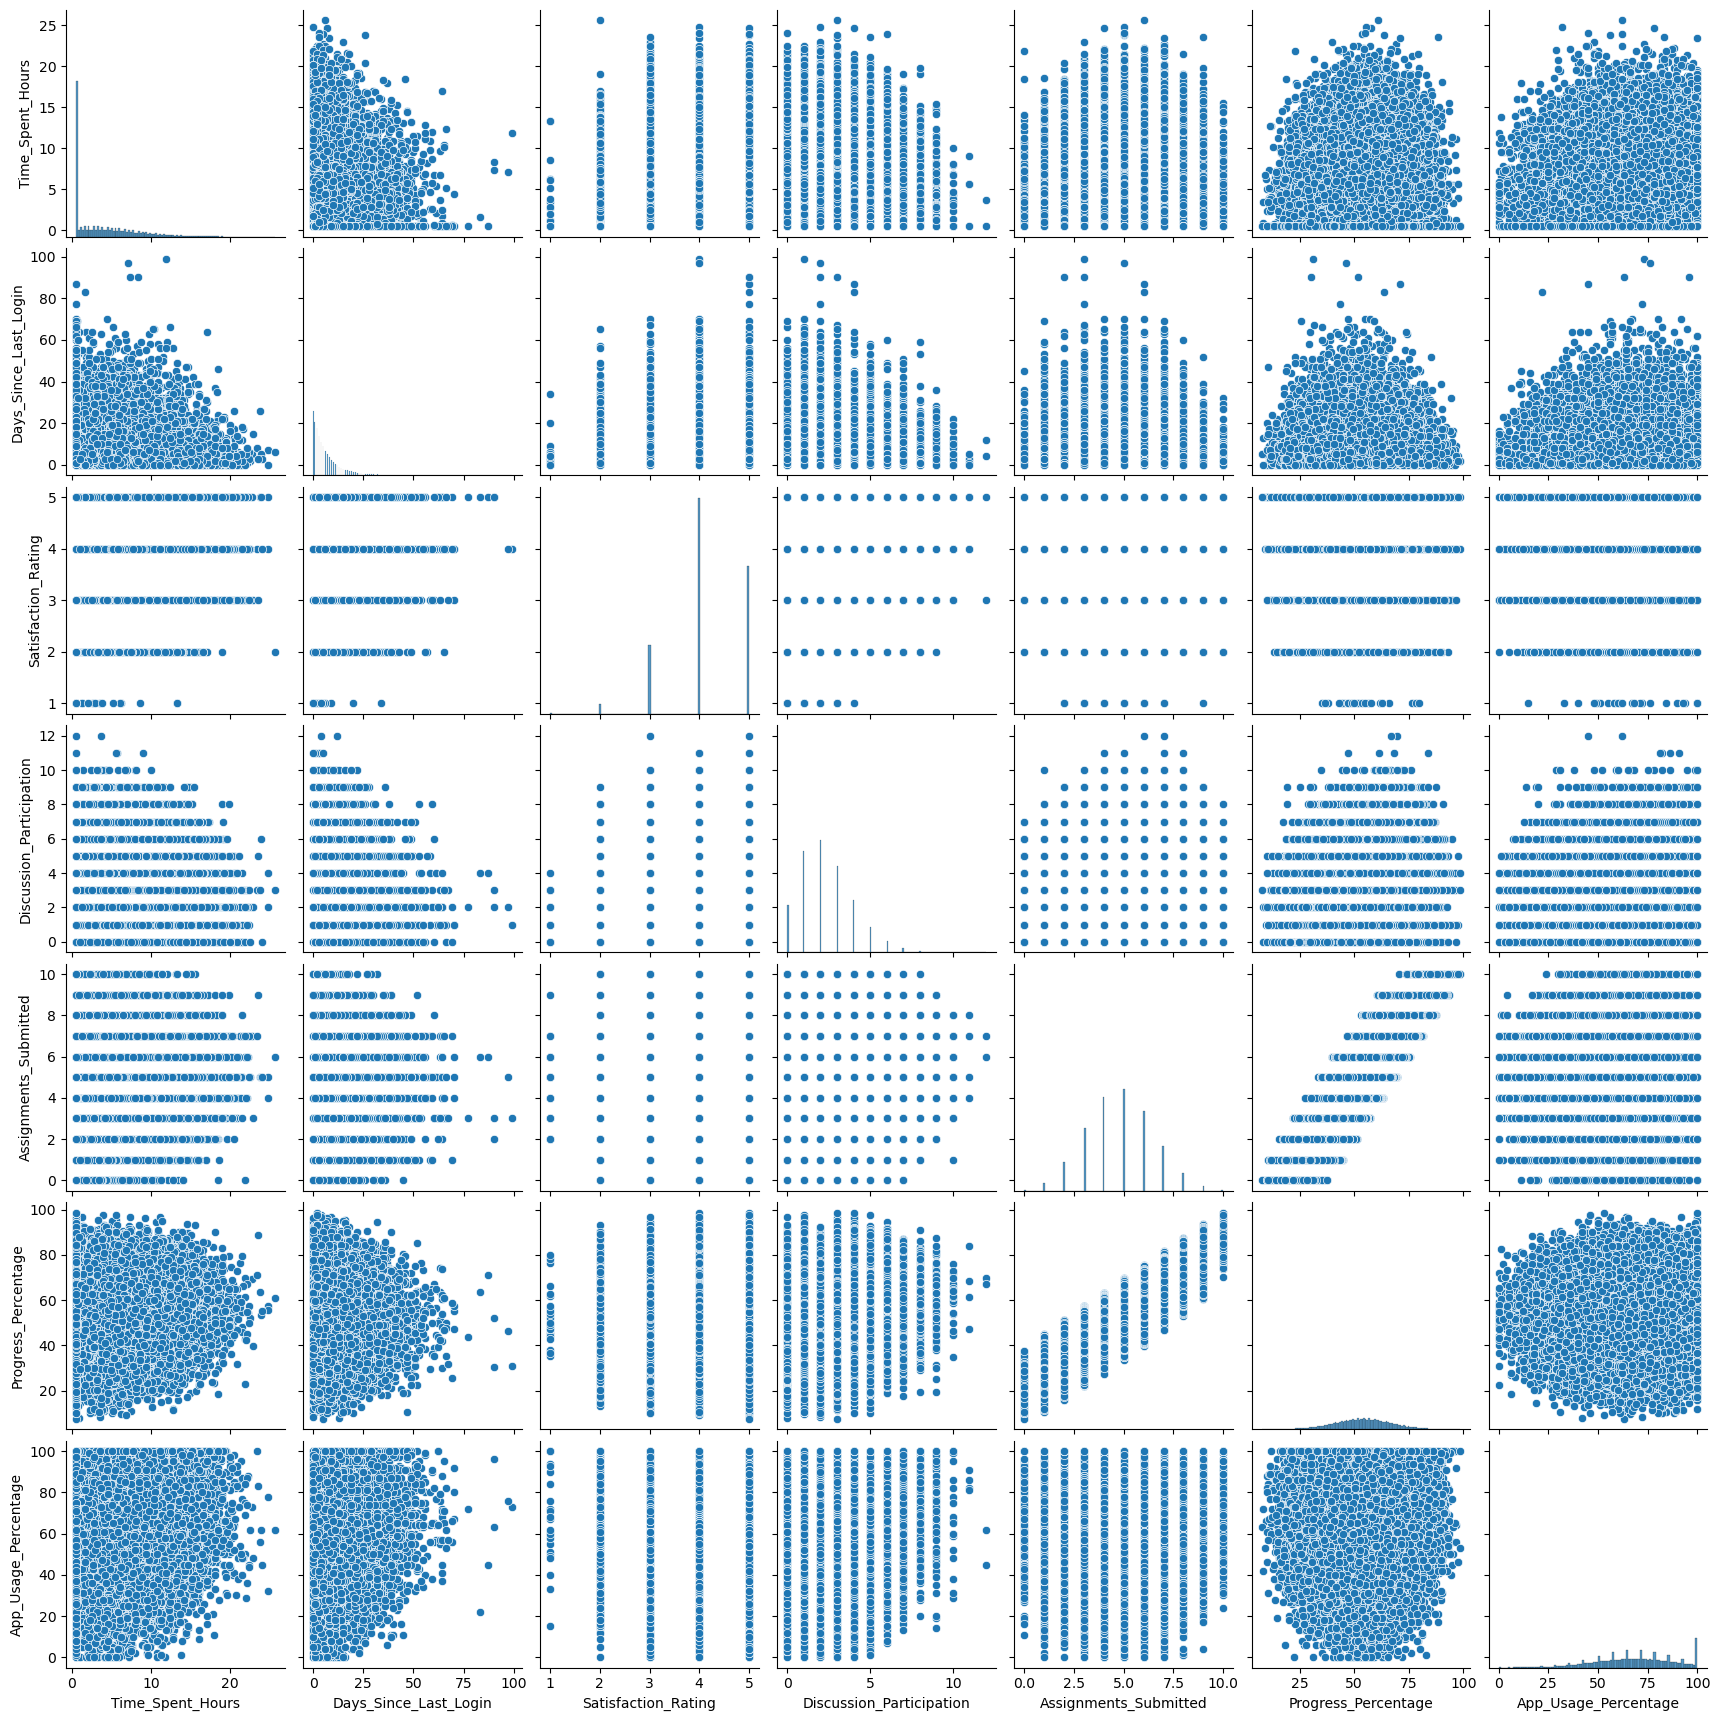

In [7]:
## Initial look at pairplot
sns.pairplot(data=df2)

In [8]:
df2["Time_Spent_Hours"].value_counts()

Time_Spent_Hours
0.5     33949
2.1       815
3.1       806
2.2       805
2.0       792
        ...  
25.6        1
23.8        1
23.4        1
22.7        1
23.5        1
Name: count, Length: 227, dtype: int64

In [9]:
## Filters
df2 = df2[df2["Days_Since_Last_Login"] < 75]
df2 = df2[df2["Time_Spent_Hours"] > 0.5]

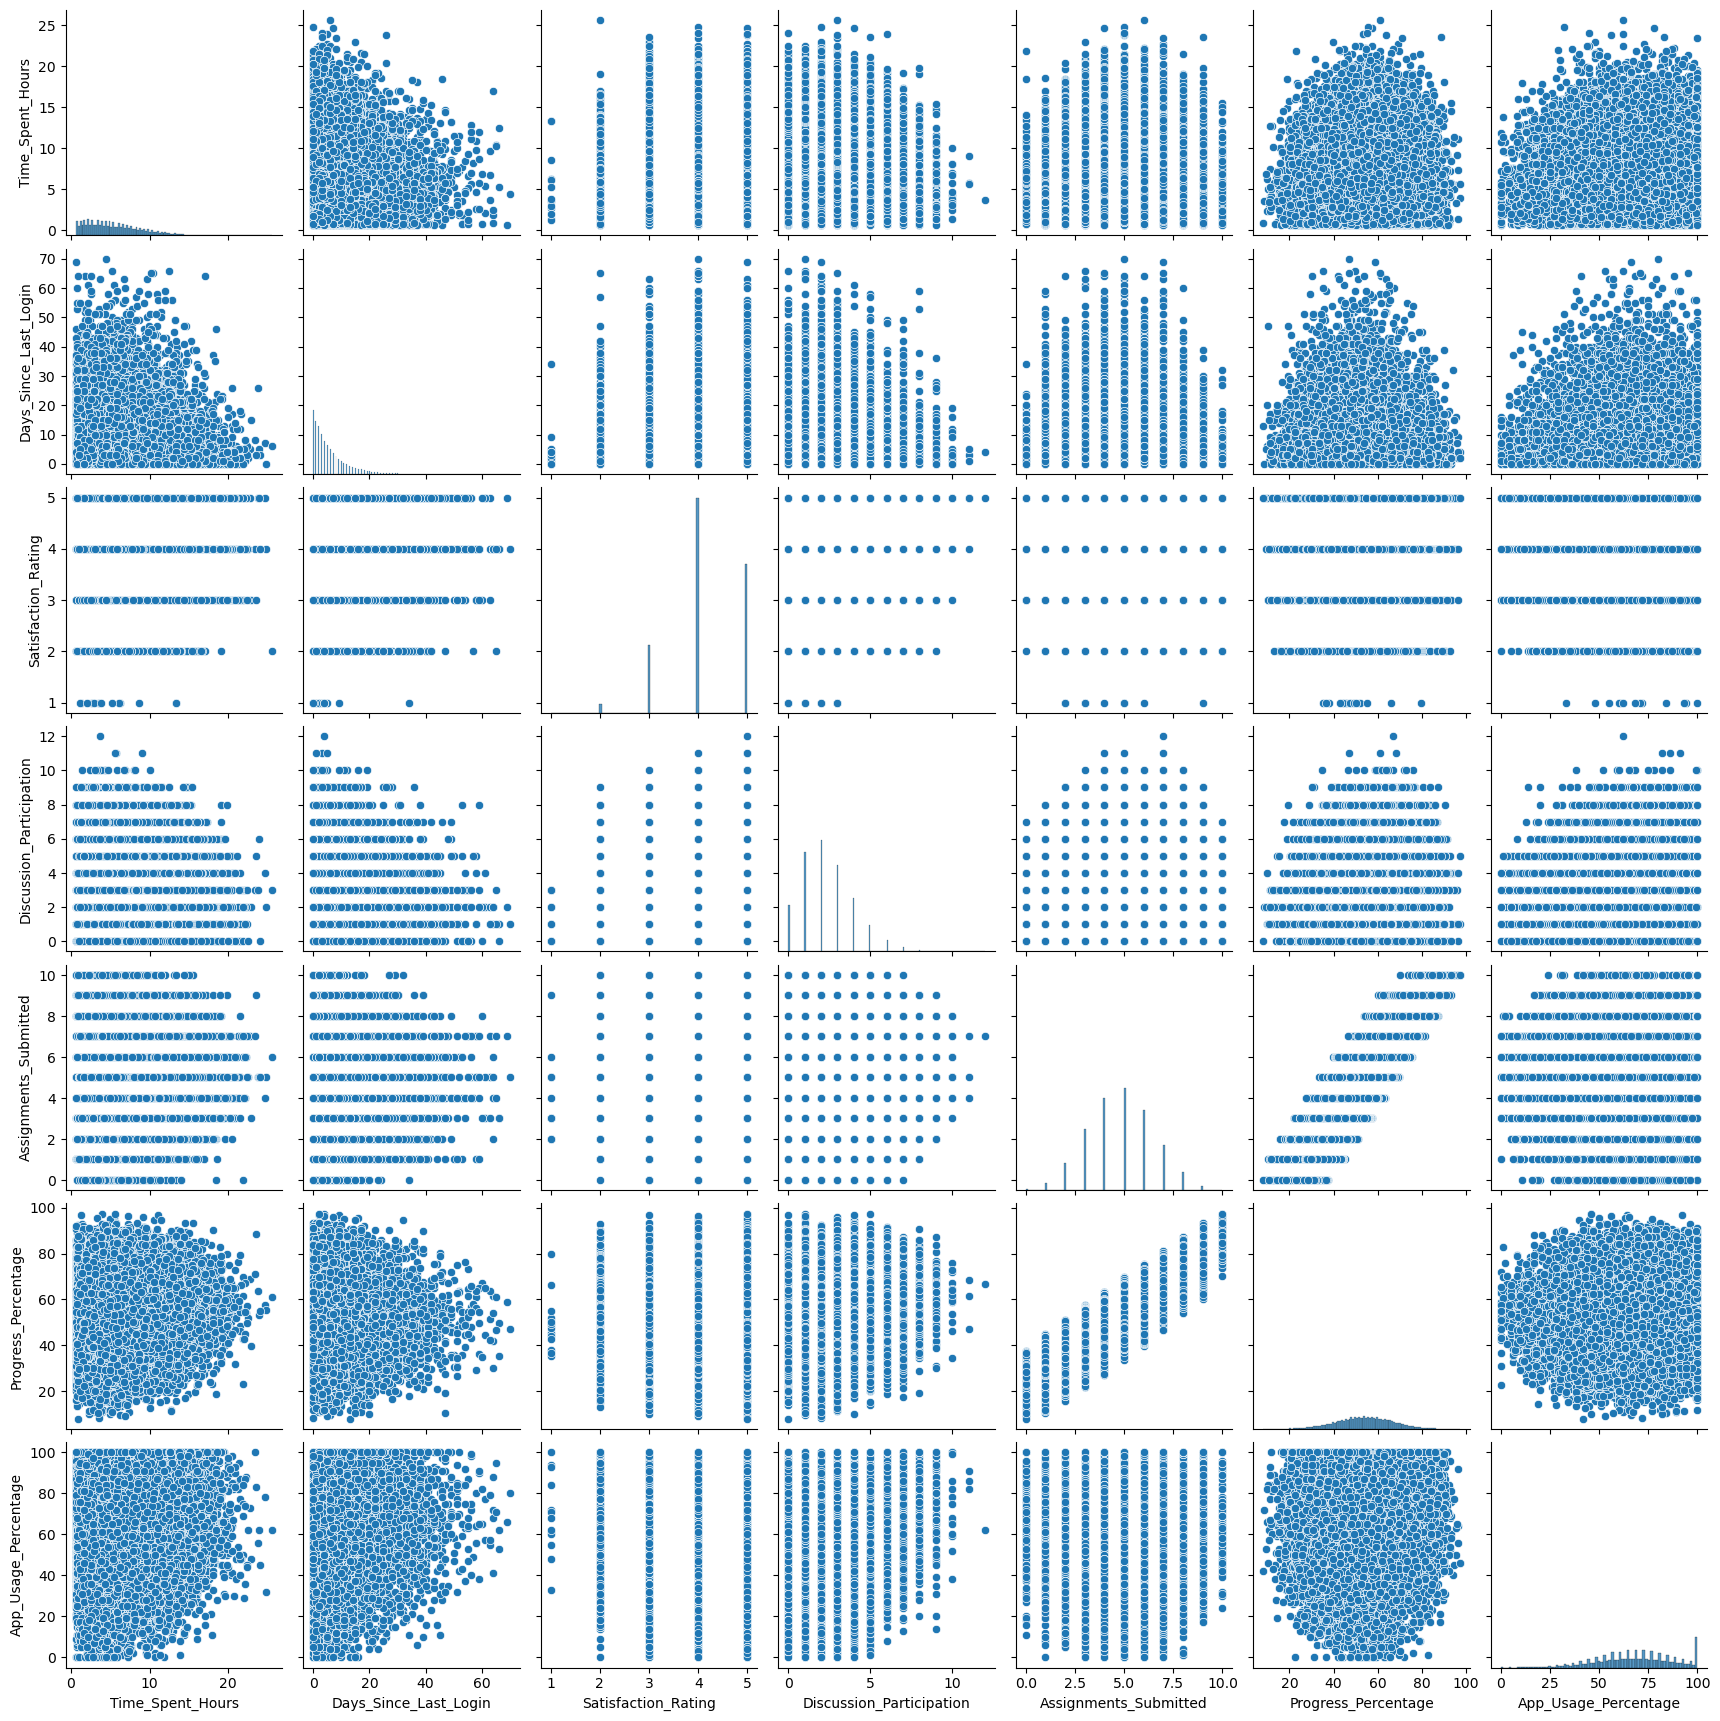

In [10]:
## Rechecking pairplot
sns.pairplot(df2)

#### EDA Explanation and Prep
<li>Changed the column typing for the string columns to categories for later<br/>
<li>Certain columns like Education_Level & Course_Level could use Ordinal Encoding instead of just 1-Hot
<p>Filtered these outliers:</p>
<ul>
<li>Time_Spent_Hours - massive count for 0.5 hours compared to the rest
<li>Days_Since_Last_Login - very few had greater than 75 days
<br>

#### Vincent Model Section (TARGET_COL = "Completed") - Logistic Regression (Multicollinearity)

##### Overall Process Summary:
<ul>
<li>Encode columns - ordinal for Education_Level & Course_Level since they could be considered to have ranking, then 1-Hot encoding for the rest
<li>Make 2 models to compare scaler methods - Normalization or Standardization
<li>Compare them, then whichever is better use that one when examining multicollinerarity
<li>Look at VIF scores and drop columns that are over 10: Progress_Percentage, Assignments_Submitted, Satisfaction_Rating, App_Usage_Percentage
<li>Make smaller model using smaller feature set and evaluate/compare
<br>


In [11]:
df2.head()

,Gender,Education_Level,Employment_Status,Course_Level,Time_Spent_Hours,Days_Since_Last_Login,Satisfaction_Rating,Discussion_Participation,Assignments_Submitted,Progress_Percentage,Payment_Mode,Discount_Used,App_Usage_Percentage,Completed
1,Female,Bachelor,Student,Advanced,0.9,3,4.0,2,4,55.6,Credit Card,No,86,Not Completed
3,Female,Diploma,Employed,Beginner,7.4,19,4.0,1,0,24.7,UPI,No,42,Completed
5,Female,Bachelor,Student,Intermediate,11.8,4,4.0,1,7,75.3,UPI,No,74,Completed
8,Male,Bachelor,Student,Intermediate,0.9,2,5.0,2,10,92.3,Credit Card,Yes,78,Completed
9,Male,Bachelor,Student,Beginner,3.3,0,4.0,2,3,42.9,UPI,Yes,48,Completed


##### Encoding

In [12]:
## Encoding features
## First Ordinal encoding for the categorical columns with ranking/order
df2_enc = df2.copy()
ordinal_columns = ["Education_Level", "Course_Level"]
ord_enc = {column: OrdinalEncoder() for column in ordinal_columns}
for column in ordinal_columns:
    df2_enc[[column]] = ord_enc[column].fit_transform(df2_enc[[column]])

## 1-Hot for the rest of the categories
df2_enc = pd.get_dummies(df2_enc, drop_first=True)

df2_enc.head()

,Education_Level,Course_Level,Time_Spent_Hours,Days_Since_Last_Login,Satisfaction_Rating,Discussion_Participation,Assignments_Submitted,Progress_Percentage,App_Usage_Percentage,Gender_Male,...,Employment_Status_Self-Employed,Employment_Status_Student,Employment_Status_Unemployed,Payment_Mode_Debit Card,Payment_Mode_Free,Payment_Mode_NetBanking,Payment_Mode_Scholarship,Payment_Mode_UPI,Discount_Used_Yes,Completed_Not Completed
1,0.0,0.0,0.9,3,4.0,2,4,55.6,86,False,...,False,True,False,False,False,False,False,False,False,True
3,1.0,1.0,7.4,19,4.0,1,0,24.7,42,False,...,False,False,False,False,False,False,False,True,False,False
5,0.0,2.0,11.8,4,4.0,1,7,75.3,74,False,...,False,True,False,False,False,False,False,True,False,False
8,0.0,2.0,0.9,2,5.0,2,10,92.3,78,True,...,False,True,False,False,False,False,False,False,True,False
9,0.0,1.0,3.3,0,4.0,2,3,42.9,48,True,...,False,True,False,False,False,False,False,True,True,False


In [13]:
## Baseline Accuracy
print(f"Baseline Accuracy: {df2_enc["Completed_Not Completed"].mean():.2%}")

Baseline Accuracy: 48.70%


##### Initial modeling

In [14]:
## Reshaping for x,y
df2_y = df2_enc["Completed_Not Completed"]
df2_x = df2_enc.drop(columns={"Completed_Not Completed"})

x1 = np.array(df2_x)
y1 = np.array(df2_y).reshape(-1, 1)
print(x1.shape, y1.shape)

## Split train & test data
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3)

(66046, 20) (66046, 1)


In [15]:
## For confusion matrix heatmap
def convert_prob_to_label(prob, cutoff = 0.5):
    label = []
    for i in range(len(prob)):
        if prob[i] > cutoff:
            label.append(1)
        else:
            label.append(0)
    return label

In [16]:
## Get scaler methods
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## fitting the models
m1 = make_pipeline(MinMaxScaler(),
                   LogisticRegression()
                   )
m2 = make_pipeline(StandardScaler(),
                   LogisticRegression()
                   )

## Fit the models to training & get predictions from test
m1.fit(x1_train, y1_train.ravel())
m1_pred = m1.predict(x1_test)

m2.fit(x1_train, y1_train.ravel())
m2_pred = m2.predict(x1_test)

## Setup confusion matrix for comparisons
m1_label = convert_prob_to_label(np.array(m1_pred))
m1_matrix = confusion_matrix(y1_test, m1_label)

m2_label = convert_prob_to_label(np.array(m2_pred))
m2_matrix = confusion_matrix(y1_test, m2_label)


m1's F1: 0.5803091944670464
m1's Accuracy: 0.60951852225699


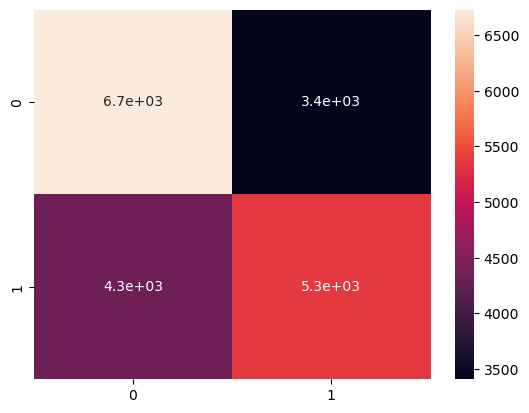

In [17]:
## m1 confusion matrix & scores
sns.heatmap(m1_matrix, annot=True)
print("m1's F1:", f1_score(y1_test, m1_label))
print("m1's Accuracy:", accuracy_score(y1_test, m1_label))

m2's F1: 0.5801725541266483
m2's Accuracy: 0.60951852225699


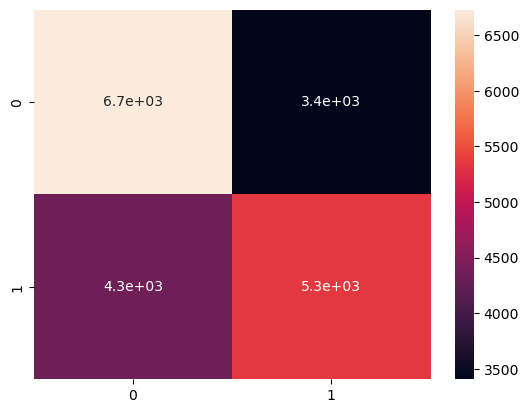

In [18]:
## m2 confusion matrix & scores
sns.heatmap(m2_matrix, annot=True)
print("m2's F1:", f1_score(y1_test, m2_label))
print("m2's Accuracy:", accuracy_score(y1_test, m2_label))

<p>Both scaling methods' results seem pretty much the same so either seems fine
</p>
<br>

##### Examining Multicollinearity

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [20]:
## Change Bool columns to int to calculate VIF
df2tmp = df2_x.copy()

vif_cols = ['Gender_Male',
       'Gender_Other', 'Employment_Status_Self-Employed',
       'Employment_Status_Student', 'Employment_Status_Unemployed',
       'Payment_Mode_Debit Card', 'Payment_Mode_Free',
       'Payment_Mode_NetBanking', 'Payment_Mode_Scholarship',
       'Payment_Mode_UPI', 'Discount_Used_Yes']

for col in vif_cols:
    df2tmp[col] = df2tmp[col].astype(int)

df2tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66046 entries, 1 to 99999
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Education_Level                  66046 non-null  float64
 1   Course_Level                     66046 non-null  float64
 2   Time_Spent_Hours                 66046 non-null  float64
 3   Days_Since_Last_Login            66046 non-null  int64  
 4   Satisfaction_Rating              66046 non-null  float64
 5   Discussion_Participation         66046 non-null  int64  
 6   Assignments_Submitted            66046 non-null  int64  
 7   Progress_Percentage              66046 non-null  float64
 8   App_Usage_Percentage             66046 non-null  int64  
 9   Gender_Male                      66046 non-null  int64  
 10  Gender_Other                     66046 non-null  int64  
 11  Employment_Status_Self-Employed  66046 non-null  int64  
 12  Employment_Status_Stude

In [21]:
calc_vif(df2tmp).sort_values(by="VIF", ascending=False)

,variables,VIF
7,Progress_Percentage,56.229892
6,Assignments_Submitted,29.816036
4,Satisfaction_Rating,20.417215
8,App_Usage_Percentage,11.866494
1,Course_Level,4.576762
2,Time_Spent_Hours,3.382255
5,Discussion_Participation,3.200447
18,Payment_Mode_UPI,2.846331
15,Payment_Mode_Free,2.219248
12,Employment_Status_Student,2.047261


In [22]:
## Recheck VIF
df2tmp = df2tmp.drop(columns={"Progress_Percentage", "Assignments_Submitted", "Satisfaction_Rating", "App_Usage_Percentage"})
calc_vif(df2tmp)

,variables,VIF
0,Education_Level,1.601287
1,Course_Level,3.851302
2,Time_Spent_Hours,3.046533
3,Days_Since_Last_Login,1.706499
4,Discussion_Participation,2.865489
5,Gender_Male,1.844416
6,Gender_Other,1.035822
7,Employment_Status_Self-Employed,1.102758
8,Employment_Status_Student,1.936972
9,Employment_Status_Unemployed,1.101899


In [23]:
## Make final model for my section
df_vif = df2_x.drop(columns={"Progress_Percentage", "Assignments_Submitted", "Satisfaction_Rating", "App_Usage_Percentage"})

xvif = np.array(df_vif)

xvif_train, xvif_test, yvif_train,yvif_test = train_test_split(xvif, y1, test_size=0.3)

model_vif's F1: 0.48781345207405674
model_vif's Accuracy: 0.5587968103361259


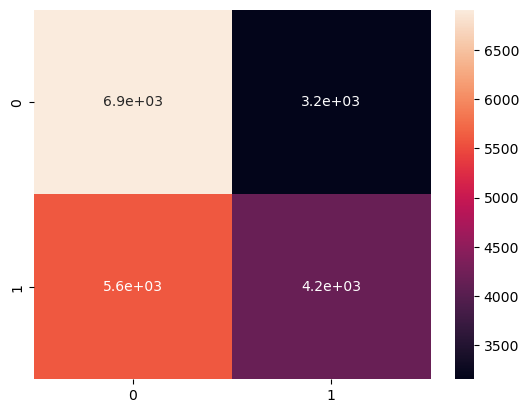

In [24]:
## Model with high VIF columns removed
model_vif = make_pipeline(MinMaxScaler(),
                          LogisticRegression()
                          )

model_vif.fit(xvif_train, yvif_train.ravel())
vif_pred = model_vif.predict(xvif_test)

model_vif_label = convert_prob_to_label(np.array(vif_pred))
model_vif_matrix = confusion_matrix(yvif_test, model_vif_label)
sns.heatmap(model_vif_matrix, annot=True)

print("model_vif's F1:", f1_score(yvif_test, model_vif_label))
print("model_vif's Accuracy:", accuracy_score(yvif_test, model_vif_label))

In [25]:
print("m1's F1:", f1_score(y1_test, m1_label))
print("m1's Accuracy:", accuracy_score(y1_test, m1_label))
print("\nm2's F1:", f1_score(y1_test, m2_label))
print("m2's Accuracy:", accuracy_score(y1_test, m2_label))
print("\nmodel_vif's F1:", f1_score(yvif_test, model_vif_label))
print("model_vif's Accuracy:", accuracy_score(yvif_test, model_vif_label))

m1's F1: 0.5803091944670464
m1's Accuracy: 0.60951852225699

m2's F1: 0.5801725541266483
m2's Accuracy: 0.60951852225699

model_vif's F1: 0.48781345207405674
model_vif's Accuracy: 0.5587968103361259


##### Evaluation (Vincent)
<p>For my approach, I chose to do a logistic regression in order to classify those who completed the course or those who didn't and build a model that can predict which group someone would fall into given a set of features. I also decided to look at how multicollinearity & feature scaling affected the model and then see what the effect would be on the model if we were to remove some of the high VIF/redundant features.
</p>
<p>In terms of evaluating the model, it seems to only be a slight increase over the baseline (~49% baseline accuracy vs. 56-60% (removing multicollinear features & feature scaling was lower than just doing feature scaling)). The results seem to indicate that my model was more accurate with just feature scaling which could possibly be due to not enough data cleanup of outliers.
</p>
<br>